# Decision Tree

# Statics

In [10]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import Bunch
from sklearn.datasets._base import load_csv_data
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Load Dataset

In [11]:
# Load Dataset
target_true = '1'
target_false = '0'
test_size = 0.2
filename = 'clean_dataset'



data_file_name = f'../../data/{filename}.csv'
pandas_dataset = pd.read_csv(data_file_name)

target_value_name = pandas_dataset.columns[-1]
feature_names = pandas_dataset.columns[0:-1]

pandas_dataset.head()

,EMERGENCY_DIA_SHORT_F05,EMERGENCY_DIA_SHORT_J12,EMERGENCY_DIA_SHORT_R06,EMERGENCY_DIA_SHORT_K52,EMERGENCY_DIA_SHORT_I10,EMERGENCY_DIA_SHORT_J22,EMERGENCY_DIA_SHORT_J84,EMERGENCY_DIA_SHORT_E87,EMERGENCY_DIA_SHORT_R09,EMERGENCY_DIA_SHORT_J98,...,ANTECEDENTS_PROC_BW03ZZZ,ANTECEDENTS_PROC_0TPBX0Z,ANTECEDENTS_PROC_F0796FZ,ANTECEDENTS_PROC_4A12X4Z,ANTECEDENTS_PROC_3E03329,SEXO,AGE_LOWER_40,AGE_40_60,AGE_HIGHER_60,RESULT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,0,0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1,0,0,1,1


# Divide dataset

In [12]:
X = pandas_dataset[feature_names]
y = pandas_dataset[target_value_name]

dataset = Bunch(
        data=X.to_numpy(),
        target=y.to_numpy(),
        target_names=target_value_name,
        feature_names=X.columns
)

#Define dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=test_size, random_state=1)
encoded_train_pandas_dataset = pd.DataFrame(data= np.c_[X_train, y_train], columns= list(dataset['feature_names']) + [target_value_name])
encoded_test_pandas_dataset = pd.DataFrame(data= np.c_[X_test, y_test], columns= list(dataset['feature_names']) + [target_value_name])
print()
print('Sizes (without target):')
print(f'Original size {dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')


Sizes (without target):
Original size (1744, 119)
Train size (1395, 119)
Test size (349, 119)


## Define Random Forest

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Define scorer
tree = DecisionTreeClassifier(random_state=0)

## Fit

In [14]:
# Train the random forest classifier on the Iris dataset
tree.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = tree.predict(X_test)

## Print Model

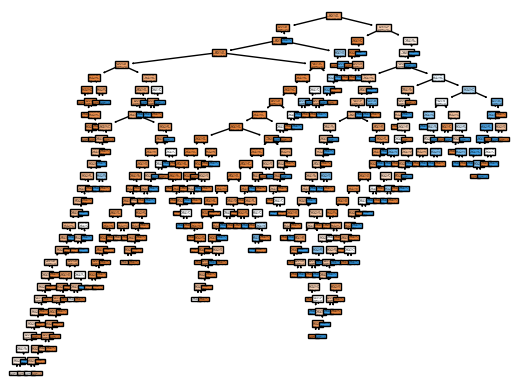

In [15]:
from sklearn.tree import export_text
from sklearn.tree import export_text, plot_tree, export_graphviz
import matplotlib.pyplot as plt


r = export_text(tree, feature_names=list(dataset.feature_names))
#print(f'Tree :\n{r}\n')
plot_tree(tree, filled=True)
plt.show()

# EFICACIA

In [16]:
ensemble_accuracy = metrics.accuracy_score(y_test, y_pred_test, normalize=True)
print('RF accuracy:',str("{:.2f}".format(100*ensemble_accuracy))+'%')

RF accuracy: 81.95%


# SHAP explainer

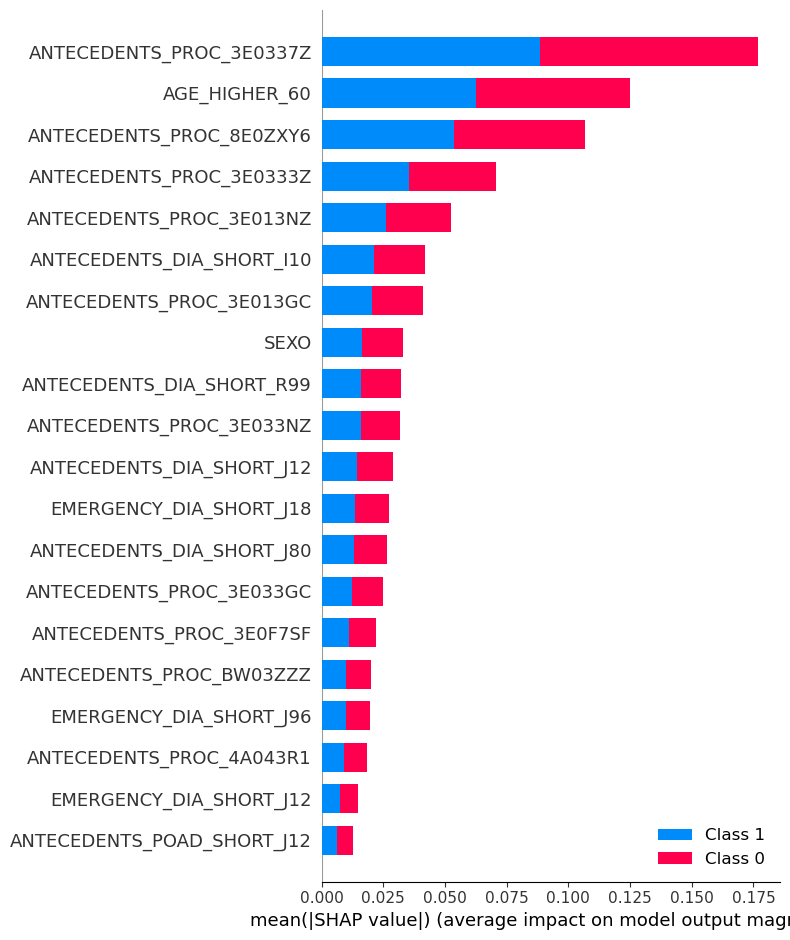

In [17]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(tree)

# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names)